In [1]:
import os
from pathlib import Path
from ultralytics import YOLO
from PIL import Image
import shutil
import pandas as pd
from source import image_id_converter as img_idc
from source import sort_img_files as sif
from source import detect_persons_yolo as dpy

In [2]:
import sys
print(sys.prefix)

/Users/stephanehess/Documents/CAS_AML/dias_digit_project/dias_huggingface__venv


In [3]:
os.getcwd()

'/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project_clean'

## Set paths:

In [4]:
#root_path = Path('/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project')

In [5]:
root_path = Path(os.getcwd())


In [6]:

# Define paths
image_dir = root_path/"../data"  # Replace with your directory containing images
output_dir_with_person = root_path/"../with_person"  # Replace with output directory for images with persons
output_dir_without_person = root_path/"../without_person"  # Replace with output directory for images without persons


In [7]:
print(image_dir)
print(output_dir_with_person)
print(output_dir_without_person)

/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project_clean/../data
/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project_clean/../with_person
/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project_clean/../without_person


## Create directories for sorting the images:

In [8]:
# Create output directories
#os.chdir(root_path/'..')
os.makedirs(output_dir_with_person, exist_ok=True)
os.makedirs(output_dir_without_person, exist_ok=True)
#os.chdir('root_path')

## Define the pretrained model:

In [9]:
# Load the YOLOv5 model
model = YOLO("yolov8n.pt")  # Use yolov8n (nano) for faster inference


## Loop through images, sort them into the respective output folders according to person detection result and store results in list:

In [10]:
# img_ids, with_person = sif.sort_img_files(image_dir, model, output_dir_with_person, 
#                                           output_dir_without_person, threshold=0.25)
#img_ids, with_person = sif.detect_persons_yolo(image_dir, model, output_dir_with_person, 
#                                         output_dir_without_person, threshold=0.25)

img_ids, with_person = dpy.detect_persons_yolo(image_dir, model, threshold=0.25, file_format="tif")

Filtering complete!


## Load person predictions into a dataframe: 

In [11]:
results_person = pd.DataFrame({'image_id': img_ids, 'with_person': with_person})
results_person.head()


,image_id,with_person
0,066,False
1,072,True
2,099,False
3,106,True
4,107,False


## Add one-hot-coded person predictions:

In [12]:
results_person['with_person_pred']= [1 if x else 0 for x in results_person.with_person]
results_person.head()

,image_id,with_person,with_person_pred
0,066,False,0
1,072,True,1
2,099,False,0
3,106,True,1
4,107,False,0


In [13]:
os.listdir(image_dir)

['BernerOberland066.tif',
 'BernerOberland072.tif',
 'BernerOberland099.tif',
 'BernerOberland106.tif',
 'BernerOberland107.tif',
 'results_img_analysis_minicpm_2025-09-14 20:42.csv',
 'BernerOberland098.tif',
 'BernerOberland073.tif',
 'BernerOberland067.tif',
 'BernerOberland_111.tif',
 'BernerOberland071.tif',
 'BernerOberland065.tif',
 'BernerOberland059.tif',
 'BernerOberland105.tif',
 'labels.csv',
 'BernerOberland110.tif',
 'BernerOberland104.tif',
 'BernerOberland058.tif',
 'BernerOberland064.tif',
 'BernerOberland070.tif',
 'labels_mod.csv',
 'BernerOberland048.tif',
 'BernerOberland074.tif',
 'BernerOberland060.tif',
 'BernerOberland100.tif',
 '.DS_Store',
 'with_without_person_mod.csv',
 'BernerOberland101.tif',
 'BernerOberland061.tif',
 'BernerOberland075.tif',
 'BernerOberland049.tif',
 'BernerOberland063.tif',
 'BernerOberland077.tif',
 'BernerOberland088.tif',
 'BernerOberland103.tif',
 'BernerOberland102.tif',
 'BernerOberland089.tif',
 'BernerOberland076.tif',
 'Berne

In [14]:
image_file_path = image_dir / 'BernerOberland043.tif'
image_file_path 

PosixPath('/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project_clean/../data/BernerOberland043.tif')

## Load person label data:

The file with_without_person.csv contains labels added by (human) visual inspection. The labels thus represent the ground truth regarding to whether or not an image contains a person. The column with_person indicates whether a person or several persons are in the image, the columns recognisable indicates whether such person would be recognisable to a human familiar with the person in question based on their appearance (according to the jugdement of the author).

In [15]:
with_without_person = pd.read_csv(image_dir/'with_without_person_mod.csv')
with_without_person


,image_id,with_person,recognisable
0,id001,1,1
1,id002,0,0
2,id003,0,0
3,id004,0,0
4,id005,0,0
...,...,...,...
106,id107,0,0
107,id108,1,0
108,id109,0,0
109,id110,0,0


In [16]:
img_ids = list(with_without_person.image_id)

In [17]:
with_without_person['image_id'] = img_idc.reconvert_image_ids(img_ids)

In [18]:
with_without_person.head()

,image_id,with_person,recognisable
0,001,1,1
1,002,0,0
2,003,0,0
3,004,0,0
4,005,0,0


## Rename the labels:

In [19]:
with_without_person.rename(columns={'with_person': 'person_label', 'recognisable': 'recognisable_label'}, inplace=True)
with_without_person.head()


,image_id,person_label,recognisable_label
0,001,1,1
1,002,0,0
2,003,0,0
3,004,0,0
4,005,0,0


## Merge label data with the predictions:

In [20]:
labels_results = with_without_person.merge(results_person, how='inner', on='image_id')
labels_results.head()

,image_id,person_label,recognisable_label,with_person,with_person_pred
0,001,1,1,True,1
1,002,0,0,True,1
2,003,0,0,False,0
3,004,0,0,False,0
4,005,0,0,False,0


In [21]:
labels_results.shape

(111, 5)

## Calculate sensitivity and specificity for person predictions and get lists images with positive person predictions:

In [22]:
positive_bools = labels_results.person_label == 1
negative_bools = labels_results.person_label == 0
positive_pred_bools = labels_results.with_person_pred == 1
negative_pred_bools = labels_results.with_person_pred == 0

positives = labels_results[positive_bools]
negatives = labels_results[negative_bools]
true_positives = labels_results[positive_bools & positive_pred_bools]
true_negatives = labels_results[negative_bools & negative_pred_bools]

false_negatives = labels_results[positive_bools & negative_pred_bools]
false_positives = labels_results[negative_bools & positive_pred_bools]

sensitivity = true_positives.shape[0] / positives.shape[0]
print('sensitivity:')
print(sensitivity)

specificity = true_negatives.shape[0] / negatives.shape[0]
print('specificity:')
print(specificity)


sensitivity:
0.75
specificity:
0.9120879120879121


## Inspect false negatives:

In [23]:
false_negatives

,image_id,person_label,recognisable_label,with_person,with_person_pred
9,010,1,0,False,0
15,016,1,0,False,0
28,029,1,0,False,0
48,049,1,0,False,0
110,111,1,0,False,0


## Inspect false positives:

In [24]:
false_positives

,image_id,person_label,recognisable_label,with_person,with_person_pred
1,002,0,0,True,1
34,035,0,0,True,1
35,036,0,0,True,1
43,044,0,0,True,1
45,046,0,0,True,1
60,061,0,0,True,1
104,105,0,0,True,1
105,106,0,0,True,1


In [25]:
print(f'True Positives: {true_positives.shape[0]}')
print(f'False Positives: {false_positives.shape[0]}')
print(f'True Negatives: {true_negatives.shape[0]}')
print(f'False Negatives: {false_negatives.shape[0]}')

True Positives: 15
False Positives: 8
True Negatives: 83
False Negatives: 5


In [26]:
from sklearn.metrics import confusion_matrix

Confusion Matrix:


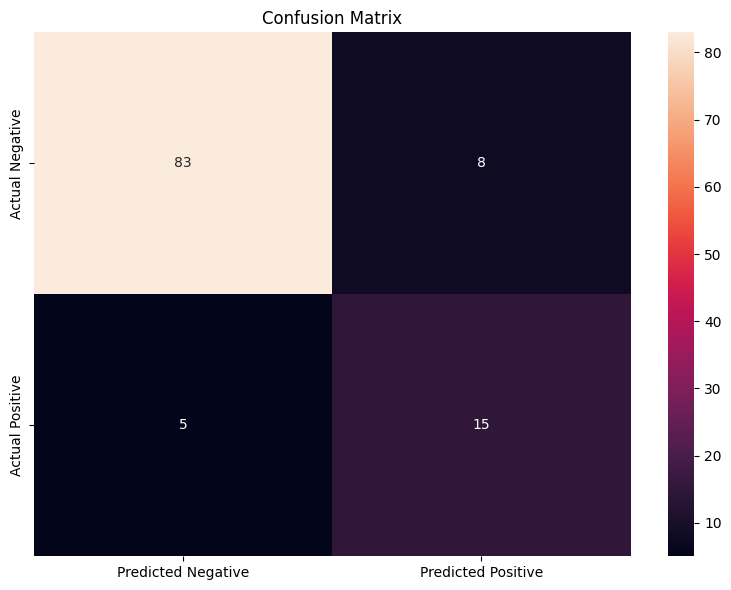

True Positives: 15
False Positives: 8
True Negatives: 83
False Negatives: 5

Sensitivity (Recall): 0.7500
Specificity: 0.9121
Precision: 0.6522
Miss Rate (False Negative Rate): 0.2500
F1 Score: 0.6977


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(labels_results.recognisable_label, labels_results.with_person_pred)

number_true_positives = true_positives.shape[0]
number_false_positives = false_positives.shape[0]
number_true_negatives = true_negatives.shape[0]
number_false_negatives = false_negatives.shape[0]

sensitivity = number_true_positives / positives.shape[0]
specificity = number_true_negatives / negatives.shape[0]
precision = number_true_positives / (number_true_positives + number_false_positives)
miss_rate = number_false_negatives / positives.shape[0]
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print("Confusion Matrix:")

plt.figure(figsize=(8,6))
confusion_matrix_data = [[number_true_negatives, number_false_positives], 
                          [number_false_negatives, number_true_positives]]
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(f'True Positives: {number_true_positives}')
print(f'False Positives: {number_false_positives}')
print(f'True Negatives: {number_true_negatives}')
print(f'False Negatives: {number_false_negatives}')
print(f'\nSensitivity (Recall): {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Miss Rate (False Negative Rate): {miss_rate:.4f}')
print(f'F1 Score: {f1_score:.4f}')

In [28]:
plt.figure(figsize=(15,8))
gs = plt.GridSpec(1, 2, width_ratios=[2, 1])

plt.subplot(gs[0])
confusion_matrix_data = [[number_true_negatives, number_false_positives], 
                         [number_false_negatives, number_true_positives]]
heatmap = sns.heatmap(confusion_matrix_data, annot=True, fmt='d', 
           xticklabels=['Predicted Negative', 'Predicted Positive'], 
           yticklabels=['Actual Negative', 'Actual Positive'],
           cbar_kws={'label': 'Number of Instances'})
plt.title('Confusion Matrix')

plt.subplot(gs[1])
plt.axis('off')
metrics_text = (f'Performance Metrics:\n\n'
               f'True Positives: {number_true_positives}\n'
               f'False Positives: {number_false_positives}\n'
               f'True Negatives: {number_true_negatives}\n'
               f'False Negatives: {number_false_negatives}\n\n'
               f'Sensitivity: {sensitivity:.4f}\n'
               f'Specificity: {specificity:.4f}\n'
               f'Precision: {precision:.4f}\n'
               f'Miss Rate: {miss_rate:.4f}\n'
               f'F1 Score: {f1_score:.4f}')
plt.text(0, 0.5, metrics_text, fontsize=10, 
        verticalalignment='center')

plt.suptitle('Confusion Matrix and Performance Metrics Based on the Person Label as Ground Truth', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix_metrics_person.pdf')
plt.close()

## Recalculate Measures with recognisable_label as ground truth (instead of person_label):

In [29]:
positive_bools = labels_results.recognisable_label == 1
negative_bools = labels_results.recognisable_label == 0
positive_pred_bools = labels_results.with_person_pred == 1
negative_pred_bools = labels_results.with_person_pred == 0

positives = labels_results[positive_bools]
negatives = labels_results[negative_bools]
true_positives = labels_results[positive_bools & positive_pred_bools]
true_negatives = labels_results[negative_bools & negative_pred_bools]

false_negatives = labels_results[positive_bools & negative_pred_bools]
false_positives = labels_results[negative_bools & positive_pred_bools]

sensitivity = true_positives.shape[0] / positives.shape[0]
print('sensitivity:')
print(sensitivity)

specificity = true_negatives.shape[0] / negatives.shape[0]
print('specificity:')
print(specificity)


sensitivity:
1.0
specificity:
0.8888888888888888


In [30]:
print(f'True Positives: {true_positives.shape[0]}')
print(f'False Positives: {false_positives.shape[0]}')
print(f'True Negatives: {true_negatives.shape[0]}')
print(f'False Negatives: {false_negatives.shape[0]}')

True Positives: 12
False Positives: 11
True Negatives: 88
False Negatives: 0


Confusion Matrix:


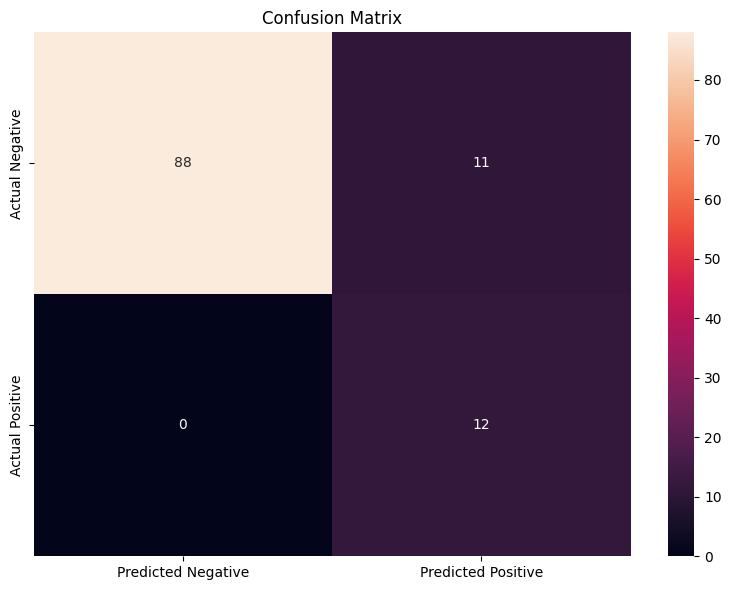

True Positives: 12
False Positives: 11
True Negatives: 88
False Negatives: 0

Sensitivity (Recall): 1.0000
Specificity: 0.8889
Precision: 0.5217
Miss Rate (False Negative Rate): 0.0000
F1 Score: 0.6857


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(labels_results.recognisable_label, labels_results.with_person_pred)

number_true_positives = true_positives.shape[0]
number_false_positives = false_positives.shape[0]
number_true_negatives = true_negatives.shape[0]
number_false_negatives = false_negatives.shape[0]

sensitivity = number_true_positives / positives.shape[0]
specificity = number_true_negatives / negatives.shape[0]
precision = number_true_positives / (number_true_positives + number_false_positives)
miss_rate = number_false_negatives / positives.shape[0]
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print("Confusion Matrix:")

plt.figure(figsize=(8,6))
confusion_matrix_data = [[number_true_negatives, number_false_positives], 
                          [number_false_negatives, number_true_positives]]
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(f'True Positives: {number_true_positives}')
print(f'False Positives: {number_false_positives}')
print(f'True Negatives: {number_true_negatives}')
print(f'False Negatives: {number_false_negatives}')
print(f'\nSensitivity (Recall): {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Miss Rate (False Negative Rate): {miss_rate:.4f}')
print(f'F1 Score: {f1_score:.4f}')

In [32]:
plt.figure(figsize=(15,8))
gs = plt.GridSpec(1, 2, width_ratios=[2, 1])

plt.subplot(gs[0])
confusion_matrix_data = [[number_true_negatives, number_false_positives], 
                         [number_false_negatives, number_true_positives]]
heatmap = sns.heatmap(confusion_matrix_data, annot=True, fmt='d', 
           xticklabels=['Predicted Negative', 'Predicted Positive'], 
           yticklabels=['Actual Negative', 'Actual Positive'],
           cbar_kws={'label': 'Number of Instances'})
plt.title('Confusion Matrix')

plt.subplot(gs[1])
plt.axis('off')
metrics_text = (f'Performance Metrics:\n\n'
               f'True Positives: {number_true_positives}\n'
               f'False Positives: {number_false_positives}\n'
               f'True Negatives: {number_true_negatives}\n'
               f'False Negatives: {number_false_negatives}\n\n'
               f'Sensitivity: {sensitivity:.4f}\n'
               f'Specificity: {specificity:.4f}\n'
               f'Precision: {precision:.4f}\n'
               f'Miss Rate: {miss_rate:.4f}\n'
               f'F1 Score: {f1_score:.4f}')
plt.text(0, 0.5, metrics_text, fontsize=10, 
        verticalalignment='center')

plt.suptitle('Confusion Matrix and Performance Metrics Based on the Recognisable Label as Ground Truth', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix_metrics_recognisable.pdf')
plt.close()

In [33]:
pred_positives = labels_results[positive_pred_bools]
pred_positives.head()

,image_id,person_label,recognisable_label,with_person,with_person_pred
0,001,1,1,True,1
1,002,0,0,True,1
12,013,1,0,True,1
13,014,1,1,True,1
14,015,1,1,True,1


In [34]:
img_ids_pos_pred = list(pred_positives.image_id)
img_ids_pos_pred

['001',
 '002',
 '013',
 '014',
 '015',
 '023',
 '032',
 '034',
 '035',
 '036',
 '044',
 '045',
 '046',
 '048',
 '053',
 '058',
 '061',
 '062',
 '070',
 '072',
 '105',
 '106',
 '108']

## Move files to corresponding folders based on person predictions:

In [35]:

for image_path in Path(image_dir).glob("*.tif"):
    #print(image_path)
    path_str = str(image_path.resolve())
    #print(path_str)
    parts = path_str.split('.tif')
    img_id = parts[-2][-3:]
    #print(img_id)
    #print(type(img_id))
    parts = path_str.split('/')
    filename = parts[-1]
    #print(filename)
    
    
    if img_id in img_ids_pos_pred:
        file_path_origin = image_path
        file_path_dest = os.path.join(output_dir_with_person, filename)
        shutil.move(file_path_origin, file_path_dest)
    else:
        file_path_origin = image_path
        file_path_dest = os.path.join(output_dir_without_person, filename)
        shutil.move(file_path_origin, file_path_dest)





## Visually inspect the images in the two folders!

Visually verified all classified images, false negatives are all images with non-recognisable persons (according to my judgement).

## Check how many images have been moved to folder output_dir_with_person:

In [41]:
files_pred_with_person = [f for f in os.listdir(output_dir_with_person) if f.endswith('.tif')]
#files_pred_with_person

In [42]:
len(files_pred_with_person)

23

## Check how many images have been moved to folder output_dir_without_person:

In [43]:
files_pred_without_person = tif_files = [f for f in os.listdir(output_dir_without_person) if f.endswith('.tif')]
#files_pred_without_person

In [44]:
len(files_pred_without_person)

88

## Save labels and results:

In [45]:
labels_results

,image_id,person_label,recognisable_label,with_person,with_person_pred
0,001,1,1,True,1
1,002,0,0,True,1
2,003,0,0,False,0
3,004,0,0,False,0
4,005,0,0,False,0
...,...,...,...,...,...
106,107,0,0,False,0
107,108,1,0,True,1
108,109,0,0,False,0
109,110,0,0,False,0


In [46]:
# Add image ids that will remain string type even when saved to csv and reloaded:
labels = list(labels_results.image_id)
new_labels = img_idc.complete_image_ids(labels)
labels_results['image_id_str'] = new_labels
labels_results

,image_id,person_label,recognisable_label,with_person,with_person_pred,image_id_str
0,001,1,1,True,1,id001
1,002,0,0,True,1,id002
2,003,0,0,False,0,id003
3,004,0,0,False,0,id004
4,005,0,0,False,0,id005
...,...,...,...,...,...,...
106,107,0,0,False,0,id107
107,108,1,0,True,1,id108
108,109,0,0,False,0,id109
109,110,0,0,False,0,id110


In [47]:
os.getcwd()

'/Users/stephanehess/Documents/CAS_AML/dias_digit_project/project_clean'

In [48]:
cols_to_select = ['image_id', 'person_label', 'recognisable_label', 'with_person_pred', 'image_id_str']

In [49]:
labels_results_to_store = labels_results[cols_to_select].copy()
labels_results_to_store

,image_id,person_label,recognisable_label,with_person_pred,image_id_str
0,001,1,1,1,id001
1,002,0,0,1,id002
2,003,0,0,0,id003
3,004,0,0,0,id004
4,005,0,0,0,id005
...,...,...,...,...,...
106,107,0,0,0,id107
107,108,1,0,1,id108
108,109,0,0,0,id109
109,110,0,0,0,id110


In [50]:
labels_results_to_store.rename({'with_person_pred': 'prediction_with_person'}, axis='columns',
                              inplace=True)

In [51]:
labels_results_to_store

,image_id,person_label,recognisable_label,prediction_with_person,image_id_str
0,001,1,1,1,id001
1,002,0,0,1,id002
2,003,0,0,0,id003
3,004,0,0,0,id004
4,005,0,0,0,id005
...,...,...,...,...,...
106,107,0,0,0,id107
107,108,1,0,1,id108
108,109,0,0,0,id109
109,110,0,0,0,id110


In [52]:
labels_results_to_store.to_csv(image_dir/'results_people_detection.csv')